# Reconocimiento de Señales de trafico con TF

In [22]:
import tensorflow as tf
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]
    labels = []
    img = []
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        file_name = [os.path.join(label_dir,f) for f in os.listdir(label_dir)
                    if f.endswith('.ppm')]
        for f in file_name:
            img.append( io.imread(f) )
            labels.append( int(d) )
    return img, labels

In [3]:
main_dir = './datasets/belgian'
train_data_dir = os.path.join(main_dir, 'Training')
test_data_dir = os.path.join(main_dir, 'Testing')
img, labels = load_ml_data(train_data_dir)

In [11]:
img = np.array(img)
labels = np.array(labels)

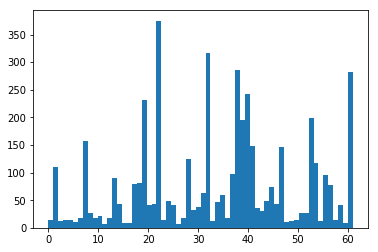

In [25]:
plt.hist(labels, len(set(labels)))
plt.show()

In [36]:
import random
n = 10
rand_signs = random.sample(range(0, len(img)), n)

Forma:(61, 63, 3), min:0, max:227
Forma:(130, 117, 3), min:12, max:255
Forma:(84, 79, 3), min:7, max:255
Forma:(127, 72, 3), min:15, max:255
Forma:(244, 253, 3), min:0, max:255
Forma:(127, 129, 3), min:11, max:255
Forma:(231, 228, 3), min:0, max:255
Forma:(43, 41, 3), min:0, max:255
Forma:(129, 128, 3), min:19, max:255
Forma:(499, 517, 3), min:0, max:255


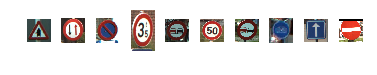

In [39]:
for i in range(len(rand_signs)):
    temp_img = img[ rand_signs[i] ]
    plt.subplot(1,n,i+1)
    plt.axis('off')
    plt.imshow( temp_img )
    plt.subplots_adjust(wspace=0.5)
    print('Forma:{0}, min:{1}, max:{2}'.format(temp_img.shape,
                                             temp_img.min(),
                                             temp_img.max()))

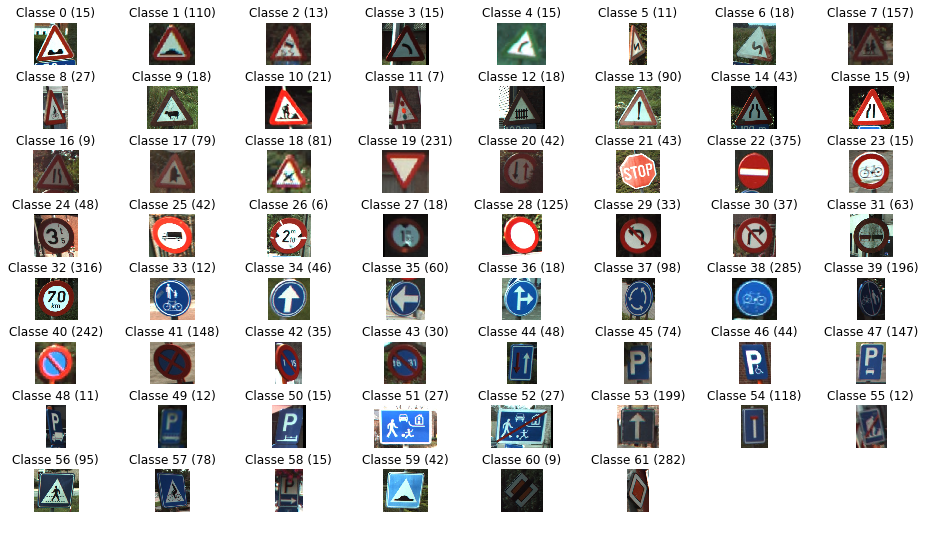

In [50]:
set_unique = set(labels)
plt.figure(figsize=(16,9))
i=1
for label in set_unique:
    temp_img = img[  list(labels).index(label) ]
    plt.subplot(8, 8, i)
    plt.axis('off')
    plt.subplots_adjust(wspace=.5, hspace=.5)
    plt.title('Classe {0} ({1})'.format(label, list(labels).count(label)))
    plt.imshow(temp_img)
    i+=1
plt.show()